# INFO 251: Final project

Members: Marius Brogaard Lerstein and Tuva Cornelia Oppenhagen

## Introduction

Description from our report:

Bike sharing is a new and important form for transportation in many cities, where the user can rent a bike at one location and leave it at their destination. An important insight to this growing business is how the weather and time affects the number of rented bikes. For our final project, we want to look into a dataset that contains data about the hourly count of rented bikes in Washington D.C. in 2011 and 2012. We want to use both regression models and classification models in order to predict the number of rented bikes based on features such as temperature, weekday, hour and season. The goal for this project is to use as many of the methods for regression and classification that we have learned in INFO 251 to find the model that gives the most accurate prediction for the number of rented bikes in Washington D.C.

<b>Link to dataset:</b> https://www.kaggle.com/datasets/marklvl/bike-sharing-dataset

This notebook contain the EDA, data cleaning and feature engineering. The dataframe we create after the data cleaning and feature engineering is stored as a CVS file and used in the regression notebook and classification notebook where we perform the predictive modeling.


## EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

seed=99
random.seed(seed)
np.random.seed(seed)

Reading the data:

In [2]:
data = pd.read_csv('data/hour.csv')

First five rows in dataframe:

In [3]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Featuretypes:

In [4]:
data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [5]:
print(f'Contains missing values {data.isnull().values.any():.4f}')

Contains missing values 0.0000


In [6]:
type(data.shape[0])

int

In [7]:
print(f'Number of rows {data.shape[0]:.4f}')
print(f'Number of columns {data.shape[1]:.4f}')

Number of rows 17379.0000
Number of columns 17.0000


The data consists of 17 features and 17379 rows.

In [8]:
data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In the table above, we can see descriptive statistics of the 16 numerical features (of 17 total features).

### Distribution of features
Vizualising the features to see if the features should be standardisez or normalized.

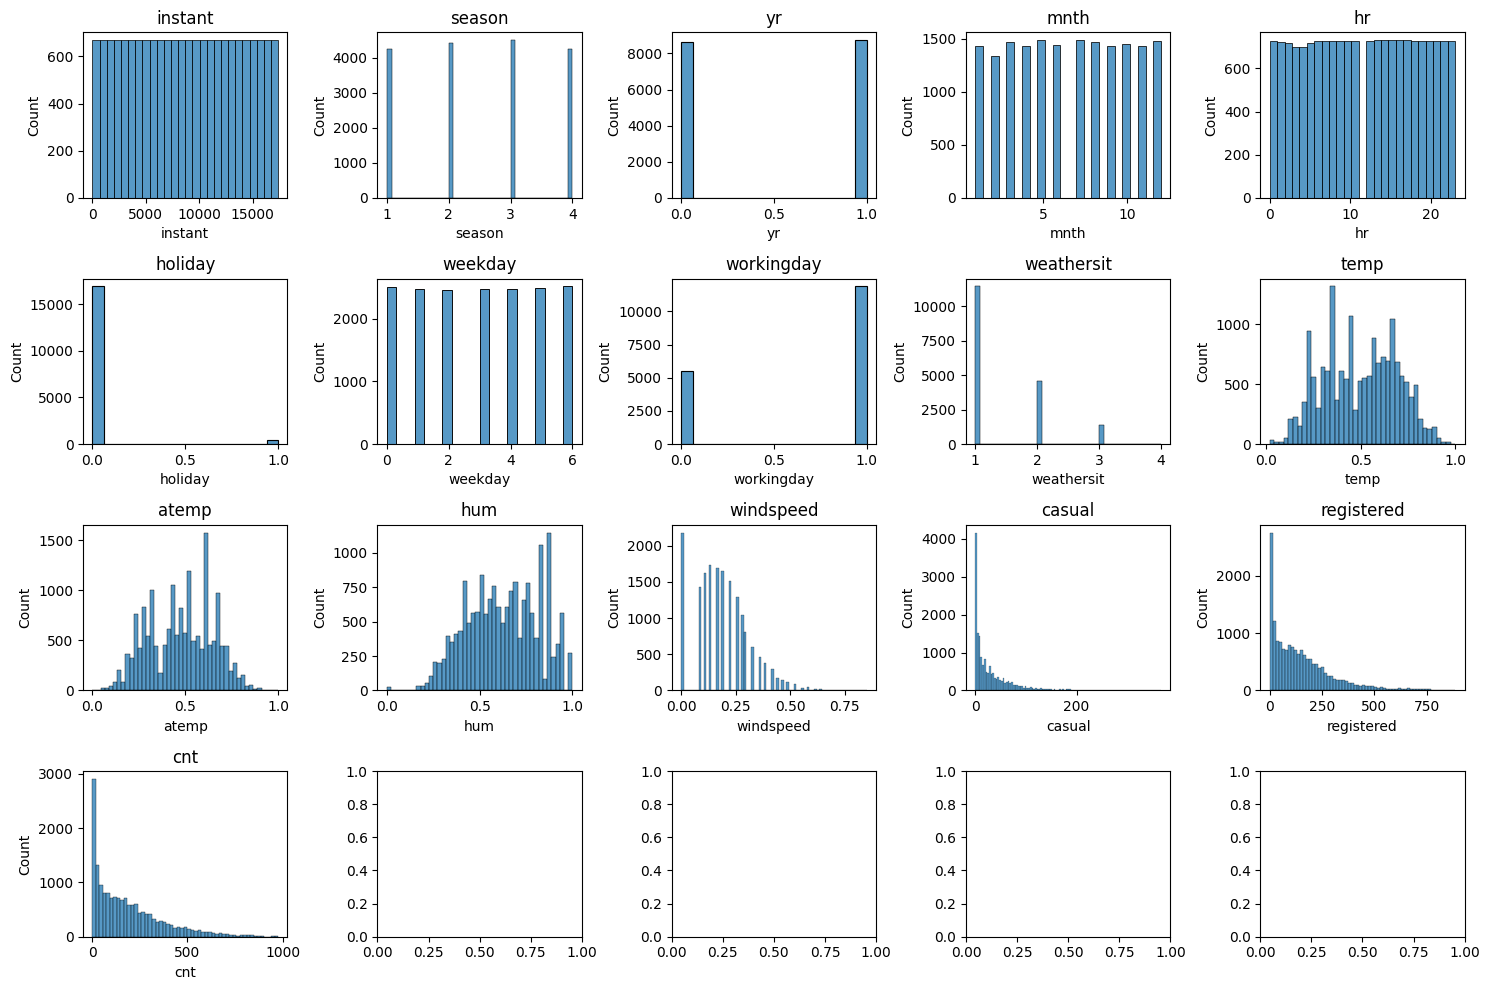

In [9]:
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(data.drop(['dteday'], axis=1).columns):
    sns.histplot(data[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

From the descriptive statistics we see that most of the features (that we want to use) have the same scaling. We do not find the scaling to be a big issue in this dataset, and have therefore not standardized or normalized our features.

## Data cleaning

From the EDA phase, we noticed some features which we concluded that should not be kept in the dataset when performing the predictive analysis.
* instant works as an index for each record in the data and should be dropped.
* yr contains which of the two years the data was from and as this information is not important, this should be dropped also.
* dteday contains the date information. This is dropped for the same reason as 'yr'.
* casual and registered combined results in the count (cnt) feature and we can therefore be dropped.

In [10]:
data = data.drop(columns=['instant', 'yr', 'dteday', 'casual', 'registered'])

## Feature Engineering

Before we perform our predictive analysis, we should recode our features into numerical values. Some of the models we will use requires this preprocessing for the input. There are several methods to numerical encode categorical values. We will use one-hot encoding on the categorical features which does not have ordinal relations, and label encoding on the features which do.

Day in the week is ordinal and this feature is usually not one-hot encoded. We used the reasoning from this discussion: https://www.mikulskibartosz.name/time-in-machine-learning/.

In [11]:
data.head()

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [12]:
ohe = OneHotEncoder()
trans_season = ohe.fit_transform(data[['season']])
data[ohe.categories_[0]] = trans_season.toarray()
data = data.drop(columns=['season'])
data = data.rename(columns={1:'season_1', 2:'season_2', 3:'season_3', 4:'season_4'})

In [13]:
ohe = OneHotEncoder()
trans_holiday = ohe.fit_transform(data[['holiday']])
data[ohe.categories_[0]] = trans_holiday.toarray()
data = data.drop(columns=['holiday'])
data = data.rename(columns={0:'holiday_0', 1:'holiday_1'})

In [14]:
ohe = OneHotEncoder()
trans_workingday = ohe.fit_transform(data[['workingday']])
data[ohe.categories_[0]] = trans_workingday.toarray()
data = data.drop(columns=['workingday'])
data = data.rename(columns={0:'workingday_0', 1:'workingday_1'})

In [15]:
ohe = OneHotEncoder()
trans_weathersit = ohe.fit_transform(data[['weathersit']])
data[ohe.categories_[0]] = trans_weathersit.toarray()
data = data.drop(columns=['weathersit'])
data = data.rename(columns={1:'weathersit_1', 2:'weathersit_2', 3:'weathersit_3', 4:'weathersit_4'})

In [16]:
print(data.columns)

Index(['mnth', 'hr', 'weekday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt',
       'season_1', 'season_2', 'season_3', 'season_4', 'holiday_0',
       'holiday_1', 'workingday_0', 'workingday_1', 'weathersit_1',
       'weathersit_2', 'weathersit_3', 'weathersit_4'],
      dtype='object')


In [17]:
print(f'Number of columns {len(data.columns):.4f}')

Number of columns 20.0000


Lastly, we are storing the dataframe as CSV to use the dataframe for our predictive modeling.

In [18]:
data.to_csv('data/rental.csv', index=False)